In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#loading dataset 1 as df1
df1= pd.read_csv('tweet_emotions.csv')
df1.head(10)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


In [2]:
#viewing no of rows and columns
n_columns= len(df1.columns)
n_rows= len(df1)
print("no of columns:", n_columns, "no of rows:", n_rows)

no of columns: 3 no of rows: 40000


In [3]:
#checking column names
print(df1.columns)

Index(['tweet_id', 'sentiment', 'content'], dtype='object')


In [4]:
#checking datatype of each column
df1.dtypes

tweet_id      int64
sentiment    object
content      object
dtype: object

In [5]:
#checking missing values in each column
df1.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [6]:
emotion_counts = df1['sentiment'].value_counts()
emotion_counts

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

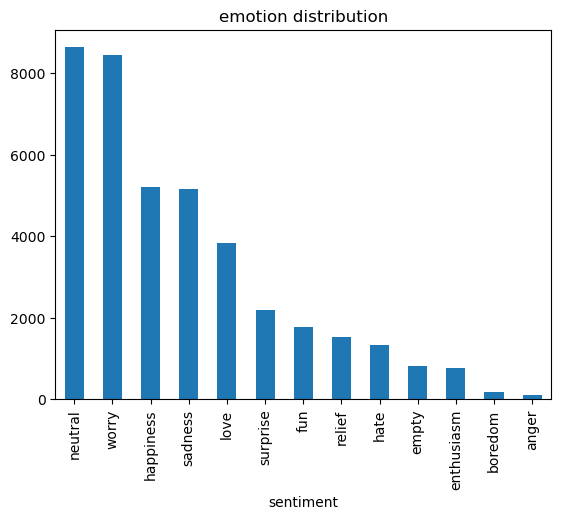

In [7]:
#plotting a barplot
emotion_counts.plot(kind= 'bar')
plt.xlabel= ("kind of emotions")
plt.ylabel= ("no of emotions")
plt.title("emotion distribution")
plt.show()


In [8]:
#Reviewing the text
print(df1.head(10)[['sentiment', 'content']])

    sentiment                                            content
0       empty  @tiffanylue i know  i was listenin to bad habi...
1     sadness  Layin n bed with a headache  ughhhh...waitin o...
2     sadness                Funeral ceremony...gloomy friday...
3  enthusiasm               wants to hang out with friends SOON!
4     neutral  @dannycastillo We want to trade with someone w...
5       worry  Re-pinging @ghostridah14: why didn't you go to...
6     sadness  I should be sleep, but im not! thinking about ...
7       worry               Hmmm. http://www.djhero.com/ is down
8     sadness            @charviray Charlene my love. I miss you
9     sadness         @kelcouch I'm sorry  at least it's Friday?


In [9]:
#Cleaning and preprocessing the texts
#converting the texts to lowercase
df1['content']= df1['content'].str.lower()
print(df1.head(20))

      tweet_id   sentiment                                            content
0   1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1   1956967666     sadness  layin n bed with a headache  ughhhh...waitin o...
2   1956967696     sadness                funeral ceremony...gloomy friday...
3   1956967789  enthusiasm               wants to hang out with friends soon!
4   1956968416     neutral  @dannycastillo we want to trade with someone w...
5   1956968477       worry  re-pinging @ghostridah14: why didn't you go to...
6   1956968487     sadness  i should be sleep, but im not! thinking about ...
7   1956968636       worry               hmmm. http://www.djhero.com/ is down
8   1956969035     sadness            @charviray charlene my love. i miss you
9   1956969172     sadness         @kelcouch i'm sorry  at least it's friday?
10  1956969456     neutral                                   cant fall asleep
11  1956969531       worry                            choked on 

In [11]:
#Removing punctuations
import string
df1['content'] = df1['content'].str.translate(str.maketrans('', '', string.punctuation))
df1.head(20)

,tweet_id,sentiment,content
0,1956967341,empty,tiffanylue i know i was listenin to bad habit...
1,1956967666,sadness,layin n bed with a headache ughhhhwaitin on y...
2,1956967696,sadness,funeral ceremonygloomy friday
3,1956967789,enthusiasm,wants to hang out with friends soon
4,1956968416,neutral,dannycastillo we want to trade with someone wh...
5,1956968477,worry,repinging ghostridah14 why didnt you go to pro...
6,1956968487,sadness,i should be sleep but im not thinking about an...
7,1956968636,worry,hmmm httpwwwdjherocom is down
8,1956969035,sadness,charviray charlene my love i miss you
9,1956969172,sadness,kelcouch im sorry at least its friday


In [12]:
#removing numbers
df1['content'] = df1['content'].str.replace(r'\d+', '', regex=True)
df1.head(20)

,tweet_id,sentiment,content
0,1956967341,empty,tiffanylue i know i was listenin to bad habit...
1,1956967666,sadness,layin n bed with a headache ughhhhwaitin on y...
2,1956967696,sadness,funeral ceremonygloomy friday
3,1956967789,enthusiasm,wants to hang out with friends soon
4,1956968416,neutral,dannycastillo we want to trade with someone wh...
5,1956968477,worry,repinging ghostridah why didnt you go to prom ...
6,1956968487,sadness,i should be sleep but im not thinking about an...
7,1956968636,worry,hmmm httpwwwdjherocom is down
8,1956969035,sadness,charviray charlene my love i miss you
9,1956969172,sadness,kelcouch im sorry at least its friday


In [14]:
#Removing extra whitespace
df1['content'] = df1['content'].str.strip()
df1['content'] = df1['content'].str.replace('\s+', ' ', regex=True)
df1.head(20)

,tweet_id,sentiment,content
0,1956967341,empty,tiffanylue i know i was listenin to bad habit ...
1,1956967666,sadness,layin n bed with a headache ughhhhwaitin on yo...
2,1956967696,sadness,funeral ceremonygloomy friday
3,1956967789,enthusiasm,wants to hang out with friends soon
4,1956968416,neutral,dannycastillo we want to trade with someone wh...
5,1956968477,worry,repinging ghostridah why didnt you go to prom ...
6,1956968487,sadness,i should be sleep but im not thinking about an...
7,1956968636,worry,hmmm httpwwwdjherocom is down
8,1956969035,sadness,charviray charlene my love i miss you
9,1956969172,sadness,kelcouch im sorry at least its friday


In [15]:
#Removing stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df1['content'] = df1['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arora\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [16]:
#lemmatization
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
df1['content'] = df1['content'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arora\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\arora\AppData\Roaming\nltk_data...
